**Importing time-series data**

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load time series dataset
df_power = pd.read_csv("C:/Users/Onkar Kadam/Desktop/Sem 6 Internship/DataSet/Sales - 9-2-24 - CSV.csv", encoding="latin1")
df_power.columns

Index(['Date', 'Months', 'Customers', 'Products', 'Sub.Products', 'H/S.ware',
       'Product Quantity', 'Location', 'Postal Code', 'Vch Type', 'Vch No.',
       'Amount', 'Year', 'Old/New', 'Old/New Customer', 'Customer Count'],
      dtype='object')

In [3]:
df_power.tail(10)

,Date,Months,Customers,Products,Sub.Products,H/S.ware,Product Quantity,Location,Postal Code,Vch Type,Vch No.,Amount,Year,Old/New,Old/New Customer,Customer Count
1951,3/29/2024,Mar,Optrascan India Private Limited,Accessories,Accessories,Hardware,1,Pune,91,Sales,AI/23-24/03/0047,424.0,2023,New_341,New,NaN
1952,3/29/2024,Mar,AARAMBH ENTERPRISES,AutoCAD 3D,AutoCAD,Software,1,Pune,91,Sales,AI/23-24/03/0049,318000.0,2023,New_447,New,1.0
1953,3/29/2024,Mar,AARAMBH ENTERPRISES,AutoCAD 2D,AutoCAD,Software,1,Pune,91,Sales,AI/23-24/03/0049,125238.0,2023,New_447,New,NaN
1954,3/29/2024,Mar,AARAMBH ENTERPRISES,Power BI,Microsoft,Software,1,Pune,91,Sales,AI/23-24/03/0049,53902.0,2023,New_447,New,NaN
1955,3/29/2024,Mar,ENTEKA SYSTEMS PVT LTD,AutoCAD 3D,AutoCAD,Software,1,Pune,91,Sales,AI/23-24/03/0050,318000.0,2023,New_448,New,1.0
1956,3/29/2024,Mar,ENTEKA SYSTEMS PVT LTD,AutoCAD 2D,AutoCAD,Software,1,Pune,91,Sales,AI/23-24/03/0050,125238.0,2023,New_448,New,NaN
1957,3/29/2024,Mar,ENTEKA SYSTEMS PVT LTD,Power BI,Microsoft,Software,1,Pune,91,Sales,AI/23-24/03/0050,53902.0,2023,New_448,New,NaN
1958,3/29/2024,Mar,Pintip Media Private Limited,M O365,Microsoft,Software,5,Mumbai,91,Sales,AI/23-24/03/0048,22420.0,2023,New_446,New,NaN
1959,3/30/2024,Mar,Pune District Nagari Sahakari Banks Associatio...,M O365,Microsoft,Software,1,Pune,91,Sales,AI/23-24/03/0051,1770.0,2023,New_421,New,NaN
1960,3/30/2024,Mar,Imark Technologies,M paper Li,Microsoft,Software,1,Pune,91,Sales,AI/23-24/03/0052,89100.0,2023,New_353,New,NaN


In [4]:
df_power.shape

(1961, 16)

In [5]:
df_power.dtypes

Date                 object
Months               object
Customers            object
Products             object
Sub.Products         object
H/S.ware             object
Product Quantity      int64
Location             object
Postal Code           int64
Vch Type             object
Vch No.              object
Amount              float64
Year                  int64
Old/New              object
Old/New Customer     object
Customer Count      float64
dtype: object

In [6]:
#convert object to datetime format
df_power['Date'] = pd.to_datetime(df_power['Date'])

In [7]:
df_power.dtypes

Date                datetime64[ns]
Months                      object
Customers                   object
Products                    object
Sub.Products                object
H/S.ware                    object
Product Quantity             int64
Location                    object
Postal Code                  int64
Vch Type                    object
Vch No.                     object
Amount                     float64
Year                         int64
Old/New                     object
Old/New Customer            object
Customer Count             float64
dtype: object

In [8]:
df_power = df_power.set_index('Date')
df_power.tail(3)

,Months,Customers,Products,Sub.Products,H/S.ware,Product Quantity,Location,Postal Code,Vch Type,Vch No.,Amount,Year,Old/New,Old/New Customer,Customer Count
Date,,,,,,,,,,,,,,,
2024-03-29,Mar,Pintip Media Private Limited,M O365,Microsoft,Software,5,Mumbai,91,Sales,AI/23-24/03/0048,22420.0,2023,New_446,New,NaN
2024-03-30,Mar,Pune District Nagari Sahakari Banks Associatio...,M O365,Microsoft,Software,1,Pune,91,Sales,AI/23-24/03/0051,1770.0,2023,New_421,New,NaN
2024-03-30,Mar,Imark Technologies,M paper Li,Microsoft,Software,1,Pune,91,Sales,AI/23-24/03/0052,89100.0,2023,New_353,New,NaN


In [9]:
df_power.index

DatetimeIndex(['2018-04-03', '2018-04-11', '2018-04-12', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-24', '2018-04-24',
               '2018-04-24', '2018-04-24',
               ...
               '2024-03-29', '2024-03-29', '2024-03-29', '2024-03-29',
               '2024-03-29', '2024-03-29', '2024-03-29', '2024-03-29',
               '2024-03-30', '2024-03-30'],
              dtype='datetime64[ns]', name='Date', length=1961, freq=None)

In [10]:
# Add columns with year, month, and weekday name
df_power['Year'] = df_power.index.year
df_power['Month'] = df_power.index.month
df_power['Weekday Name'] = df_power.index.day_name()

In [11]:
# Display a random sampling of 5 rows
df_power.sample(5, random_state=0)

,Months,Customers,Products,Sub.Products,H/S.ware,Product Quantity,Location,Postal Code,Vch Type,Vch No.,Amount,Year,Old/New,Old/New Customer,Customer Count,Month,Weekday Name
Date,,,,,,,,,,,,,,,,,
2019-07-31,Jul,JFE Engineering India Private Limited,Accessories,Accessories,Hardware,1,Pimpari-Chinchwad,91,Sales,AI/19-20/111,4500.0,2019,Old_102,Old,NaN,7,Wednesday
2019-12-02,Dec,JFE Engineering India Private Limited,Accessories,Accessories,Hardware,3,Pimpari-Chinchwad,91,Sales,AI/19-20/202,3785.0,2019,Old_102,Old,NaN,12,Monday
2022-04-15,Apr,Mukta Engineering Projects and Cables LLP,M Azure Cloud,Microsoft,Software,1,Kalyan,91,Sales,AI/21-22/04/0006,1500.0,2022,Old_264,Old,NaN,4,Friday
2019-12-18,Dec,JFE Engineering India Private Limited,AutoCAD 2D,AutoCAD,Software,5,Pimpari-Chinchwad,91,Sales,AI/19-20/213,135275.0,2019,Old_102,Old,NaN,12,Wednesday
2023-06-01,Jun,Zyphars Pharmaceutics Private Limited,M Power BI,Microsoft,Software,6,Pune,91,Sales,AI/23-24/6/0004,54870.0,2023,Old_46,Old,NaN,6,Thursday


In [12]:
df_power.loc['2019-10-02']

,Months,Customers,Products,Sub.Products,H/S.ware,Product Quantity,Location,Postal Code,Vch Type,Vch No.,Amount,Year,Old/New,Old/New Customer,Customer Count,Month,Weekday Name
Date,,,,,,,,,,,,,,,,,
2019-10-02,Oct,Mind Space Shelter LLP,AutoCAD 2D,AutoCAD,Software,8,Chakan,91,Sales,AI/19-20/161,124984.00,2019,Old_199,Old,1.0,10,Wednesday
2019-10-02,Oct,Mind Space Shelter LLP,AutoCAD 3D,AutoCAD,Software,1,Chakan,91,Sales,AI/19-20/161,103327.24,2019,Old_199,Old,NaN,10,Wednesday


In [13]:
df_power.loc['2023-01-01':'2023-12-30']

,Months,Customers,Products,Sub.Products,H/S.ware,Product Quantity,Location,Postal Code,Vch Type,Vch No.,Amount,Year,Old/New,Old/New Customer,Customer Count,Month,Weekday Name
Date,,,,,,,,,,,,,,,,,
2023-01-02,Jan,"Pune Urban Co-Op Bank Ltd., Pune",Accessories,Accessories,Hardware,1,Pune,91,Sales,AI/22-23/1/0001,28890.0,2023,New_363,New,1.0,1,Monday
2023-01-02,Jan,"Pune Urban Co-Op Bank Ltd., Pune",M Retail/Box,Microsoft,Software,1,Pune,91,Sales,AI/22-23/1/0001,20110.0,2023,New_363,New,NaN,1,Monday
2023-01-03,Jan,Taufiq Shaikh,Accessories,Accessories,Hardware,4,Pune,91,Sales,AI/22-23/1/2001,3900.0,2023,New_364,New,1.0,1,Tuesday
2023-01-05,Jan,Mind Space Shelter LLP,GstarCAD Prof.,AutoCAD,Software,7,Chakan,91,Sales,AI/22-23/1/0002,294000.0,2023,Old_199,Old,NaN,1,Thursday
2023-01-05,Jan,Mind Space Shelter LLP,AutoCAD 2D,AutoCAD,Software,12,Chakan,91,Sales,AI/22-23/1/0002,336000.0,2023,Old_199,Old,NaN,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,Dec,Hitesh Lahoti & Associates,M O365,Microsoft,Software,1,Pune,91,Sales,AI/23-24/12/0036,9086.0,2023,New_347,New,NaN,12,Friday
2023-12-29,Dec,Schuler India Private Limited,M O365,Microsoft,Software,4,Pune,91,Sales,AI/23-24/12/0038,80240.0,2023,Old_282,New,NaN,12,Friday
2023-12-29,Dec,Neo Capricorn Plaza Pvt Ltd,Sophos Firewall,Firewall,Hardware,66,Mumbai,91,Sales,AI/23-24/12/0037,84039.6,2023,Old_249,Old,NaN,12,Friday


**Visualization for time series analysis**



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 4)})
plt.rcParams['figure.dpi'] = 150

<AxesSubplot:xlabel='Date'>

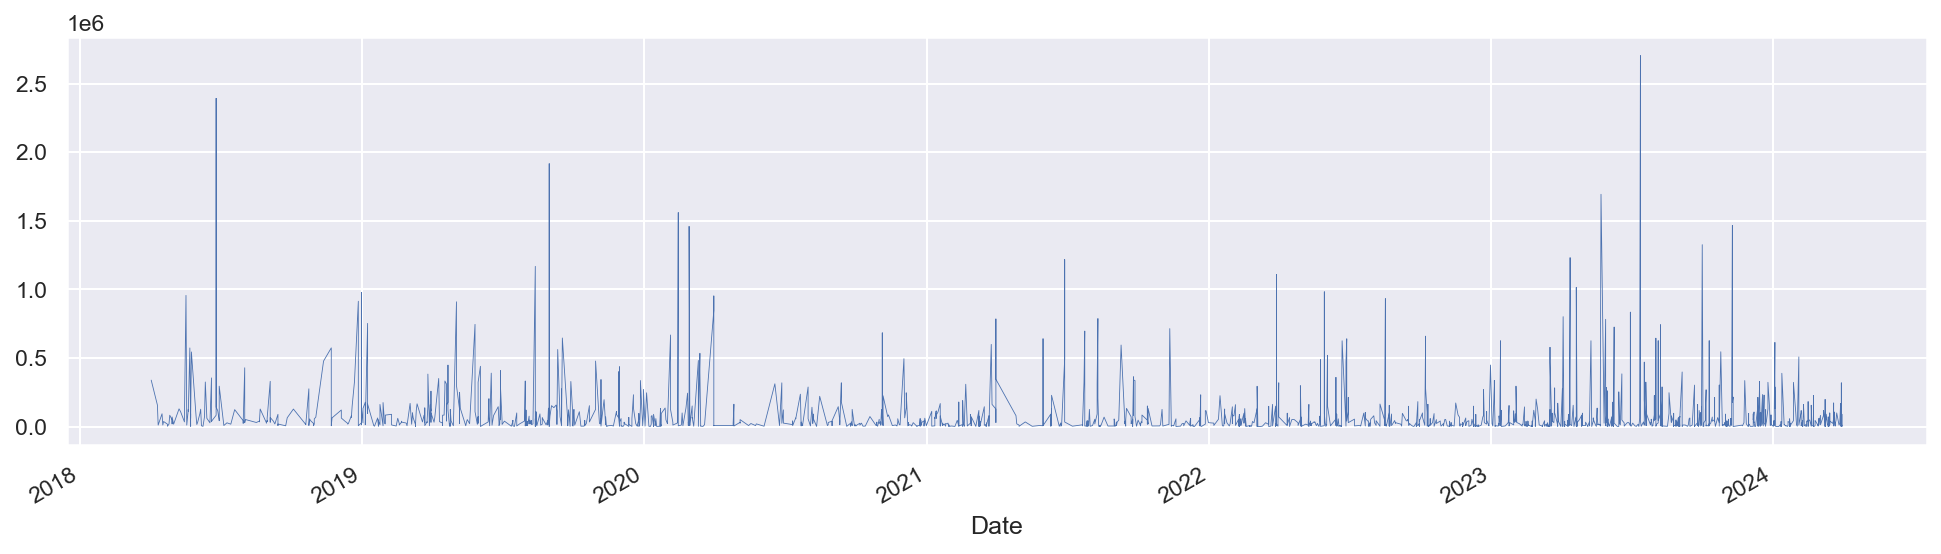

In [15]:
df_power['Amount'].plot(linewidth=0.4)

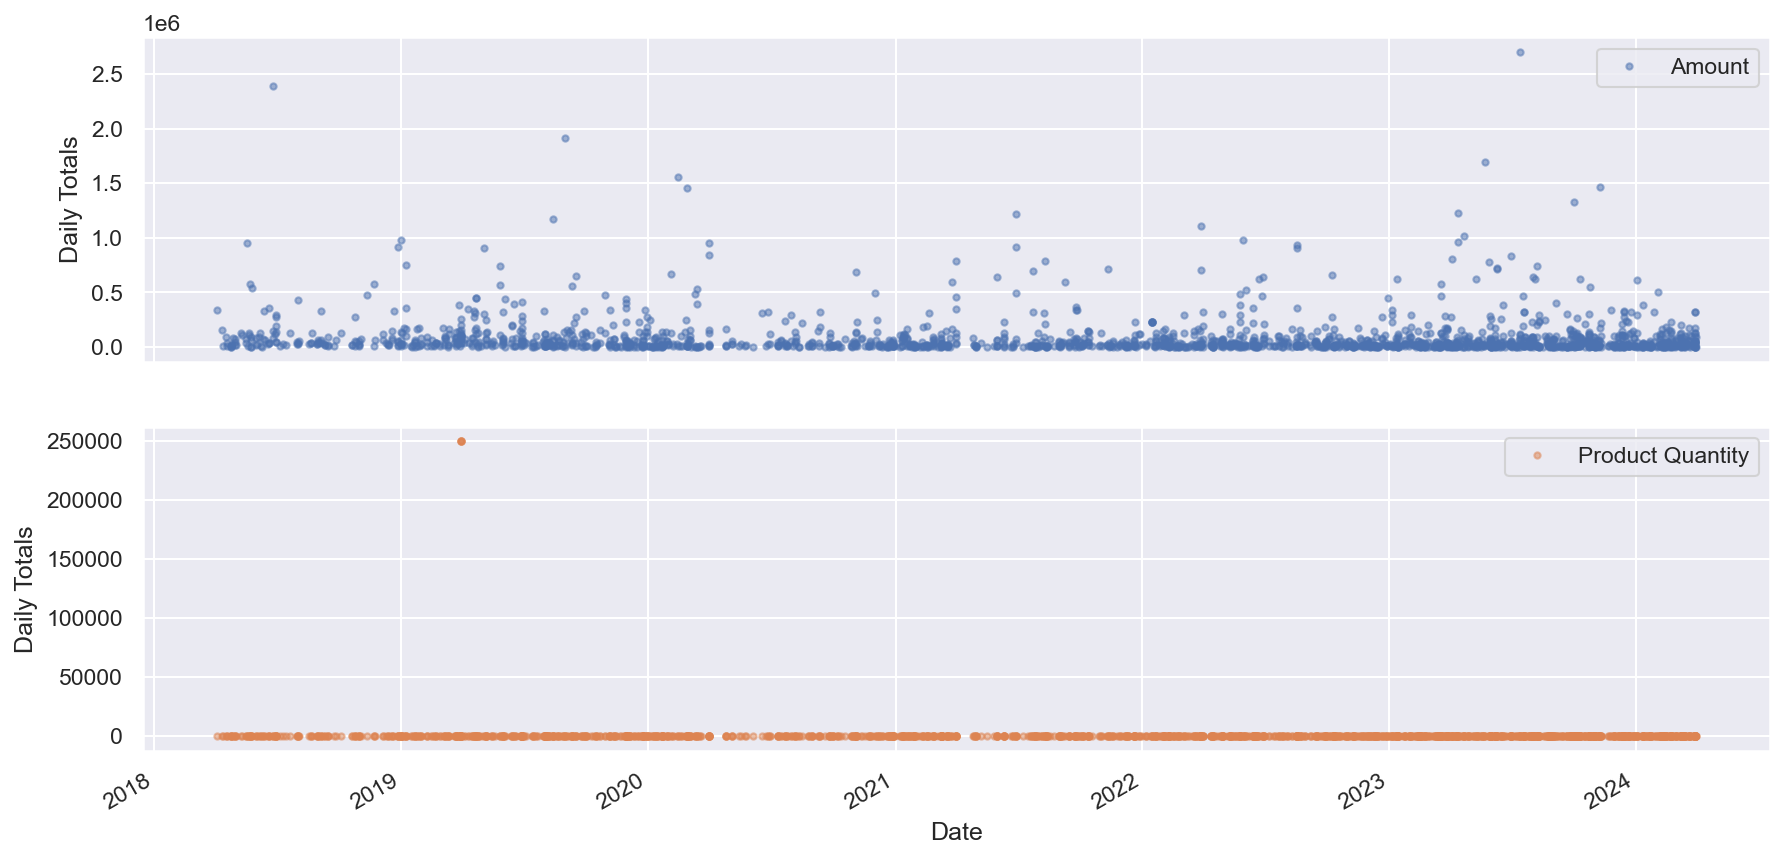

In [16]:
cols_to_plot = ['Amount', 'Product Quantity']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(14, 7), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

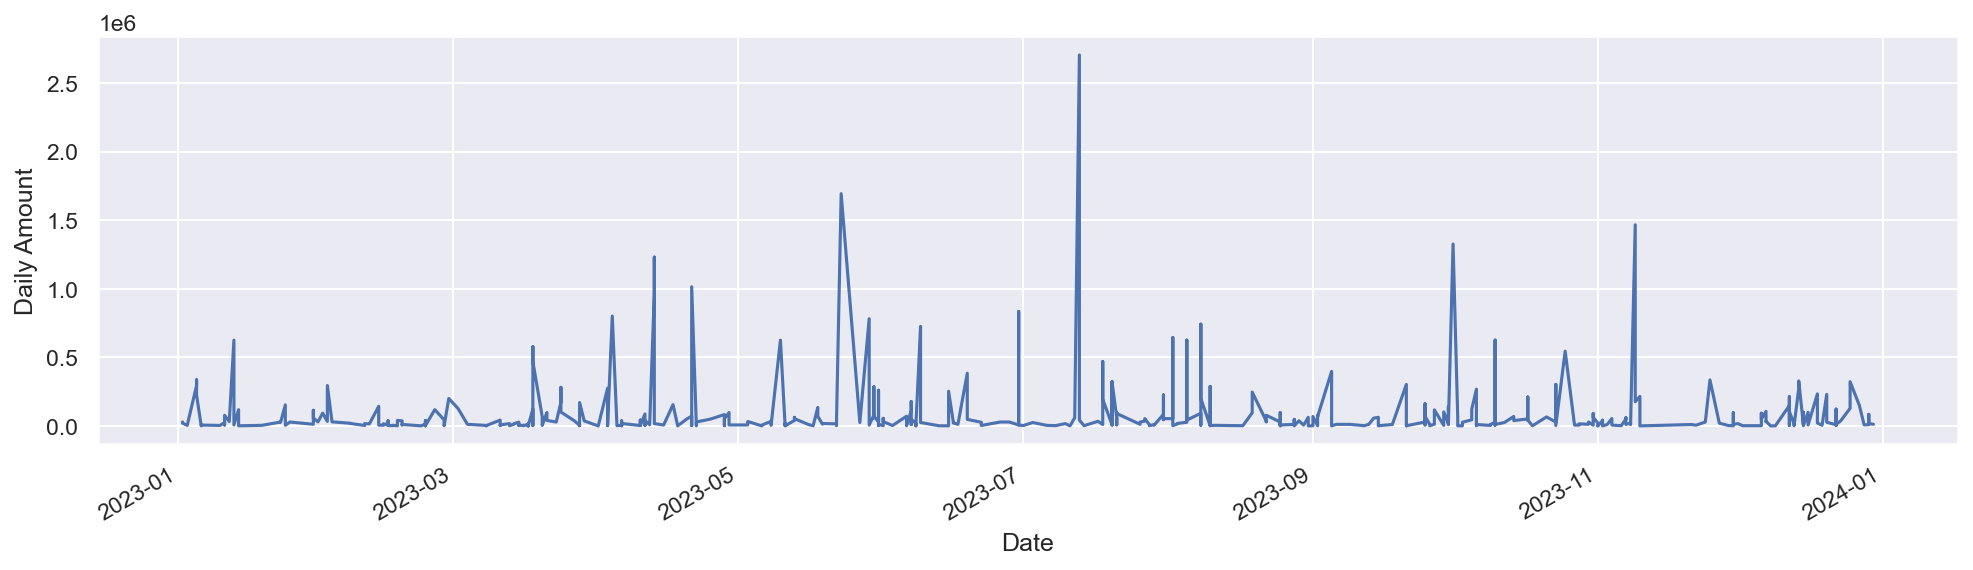

In [17]:
ax = df_power.loc['2023', 'Amount'].plot()
ax.set_ylabel('Daily Amount');


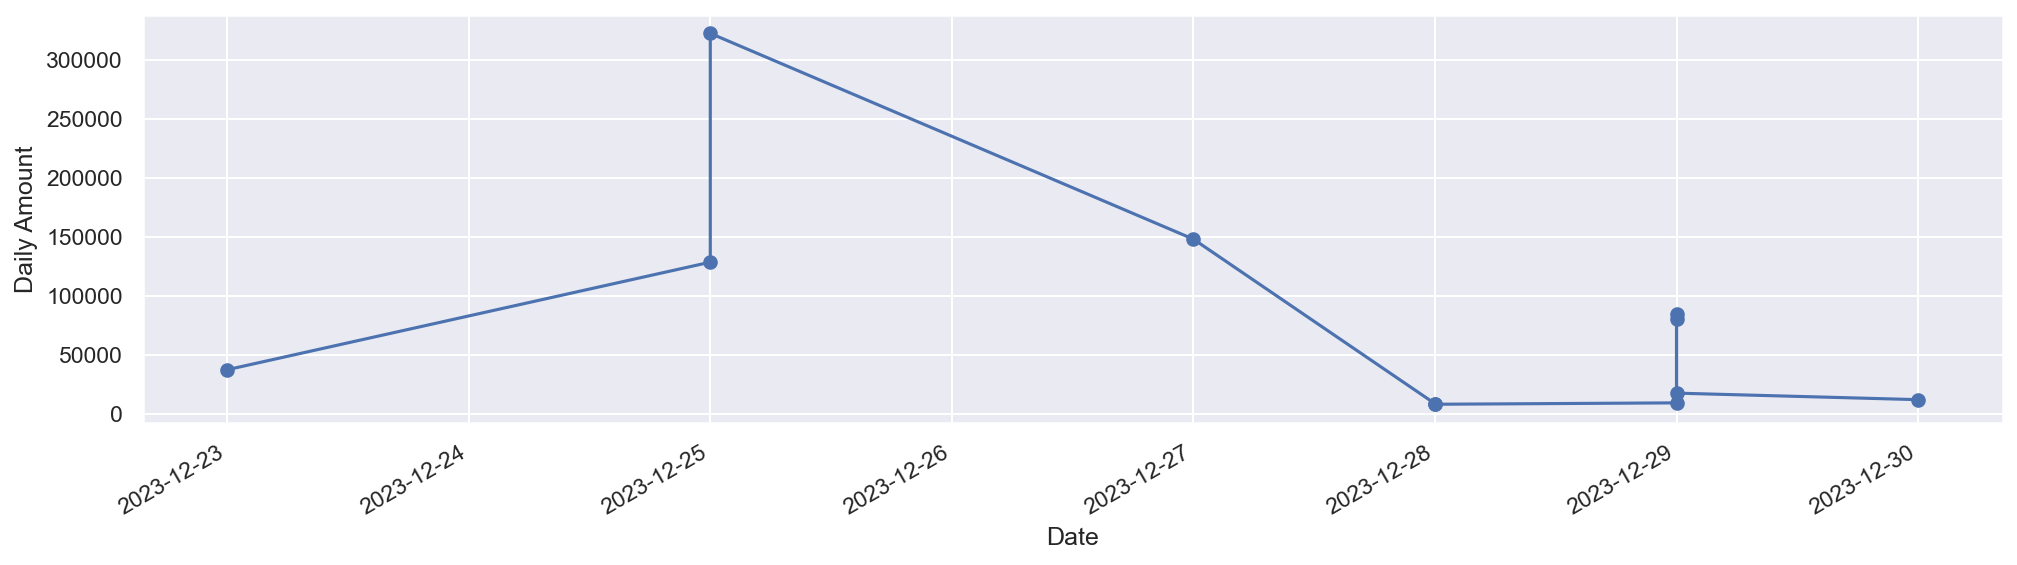

In [18]:
ax = df_power.loc['2023-12-23':'2023-12-30', 'Amount'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Amount');


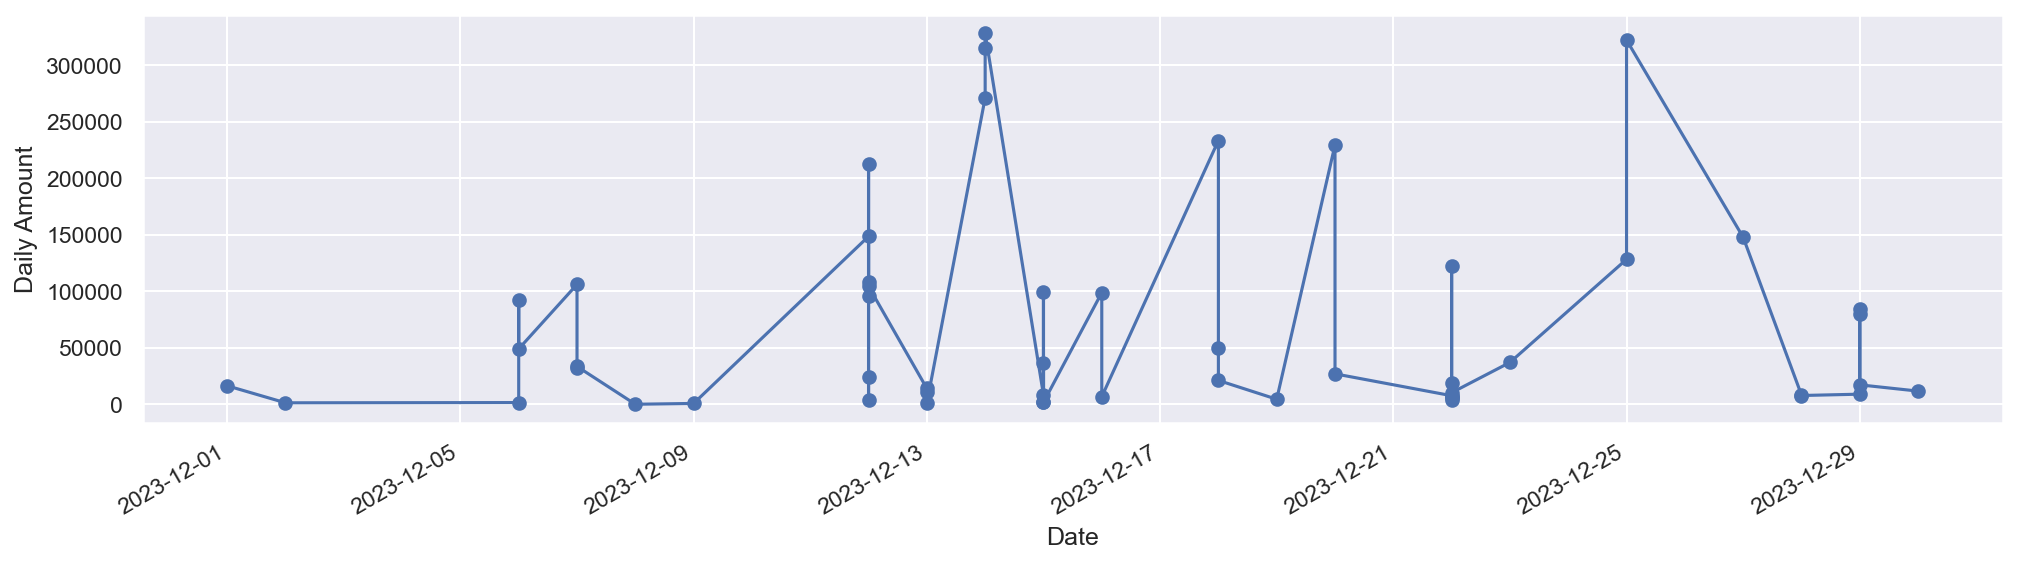

In [19]:
ax = df_power.loc['2023-12', 'Amount'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Amount');


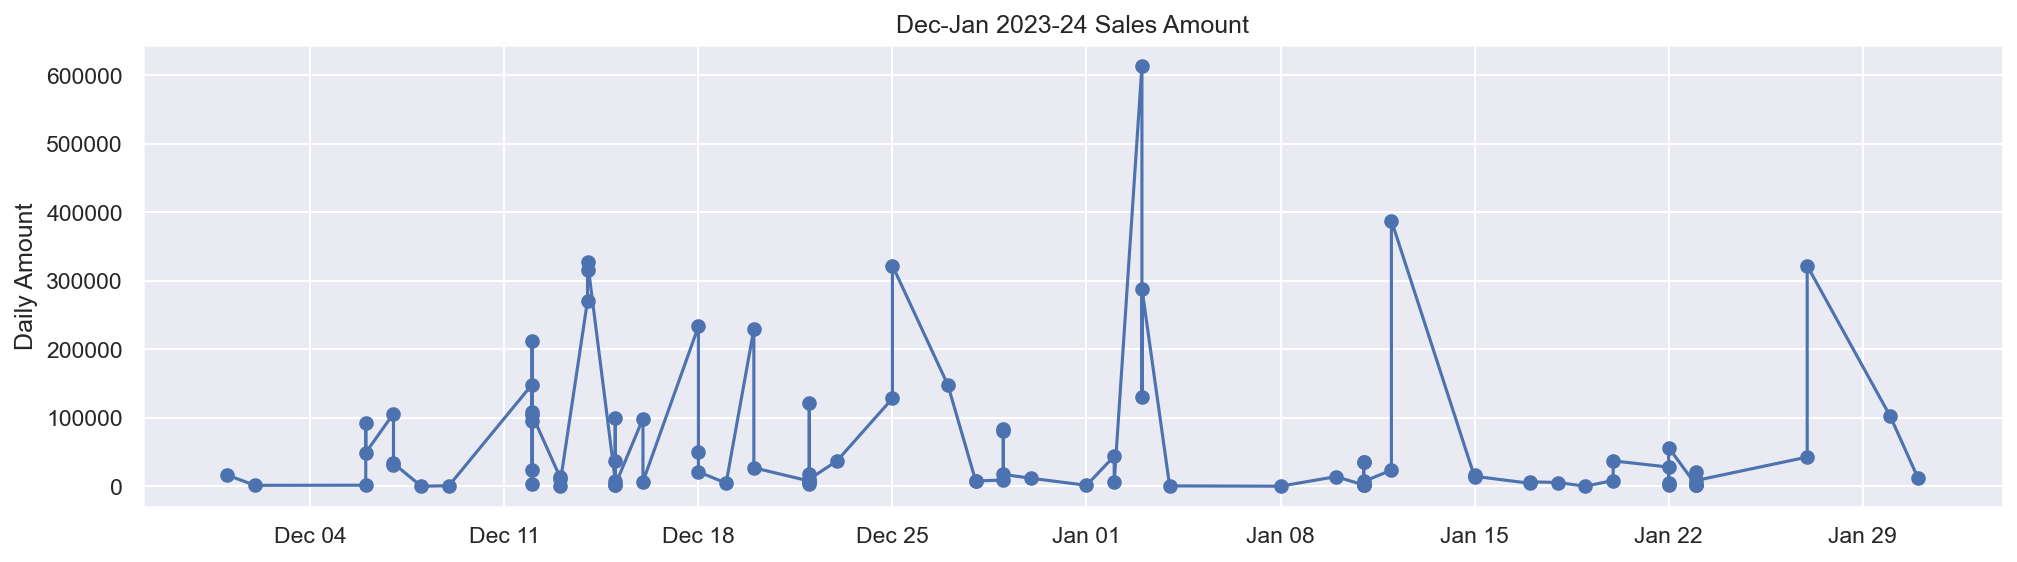

In [20]:

# import dates module from matplotlib 
import matplotlib.dates as mdates

# plot graph
fig, ax = plt.subplots()

ax.plot(df_power.loc['2023-12':'2024-01', 'Amount'], marker='o', linestyle='-')
ax.set_ylabel('Daily Amount')
ax.set_title('Dec-Jan 2023-24 Sales Amount')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# to set format for x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

**Seasonality**

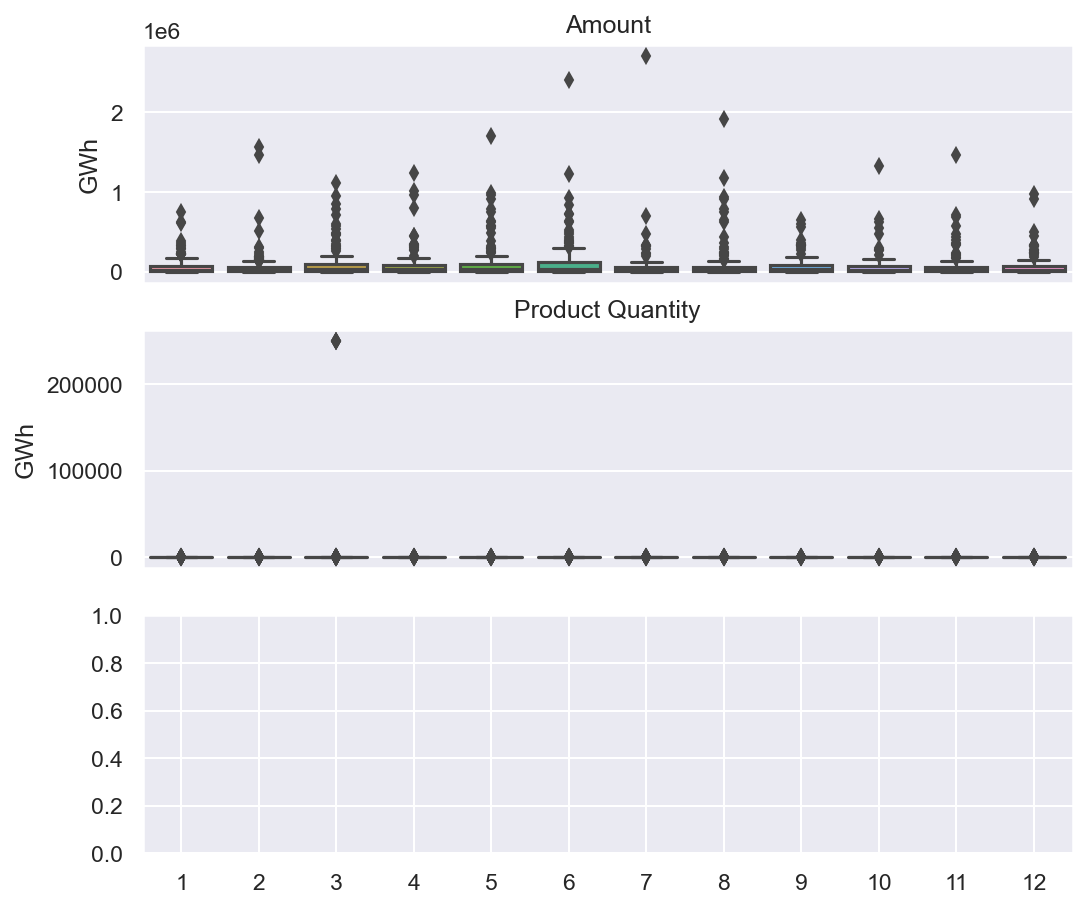

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Amount', 'Product Quantity'], axes):
  sns.boxplot(data=df_power, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')  


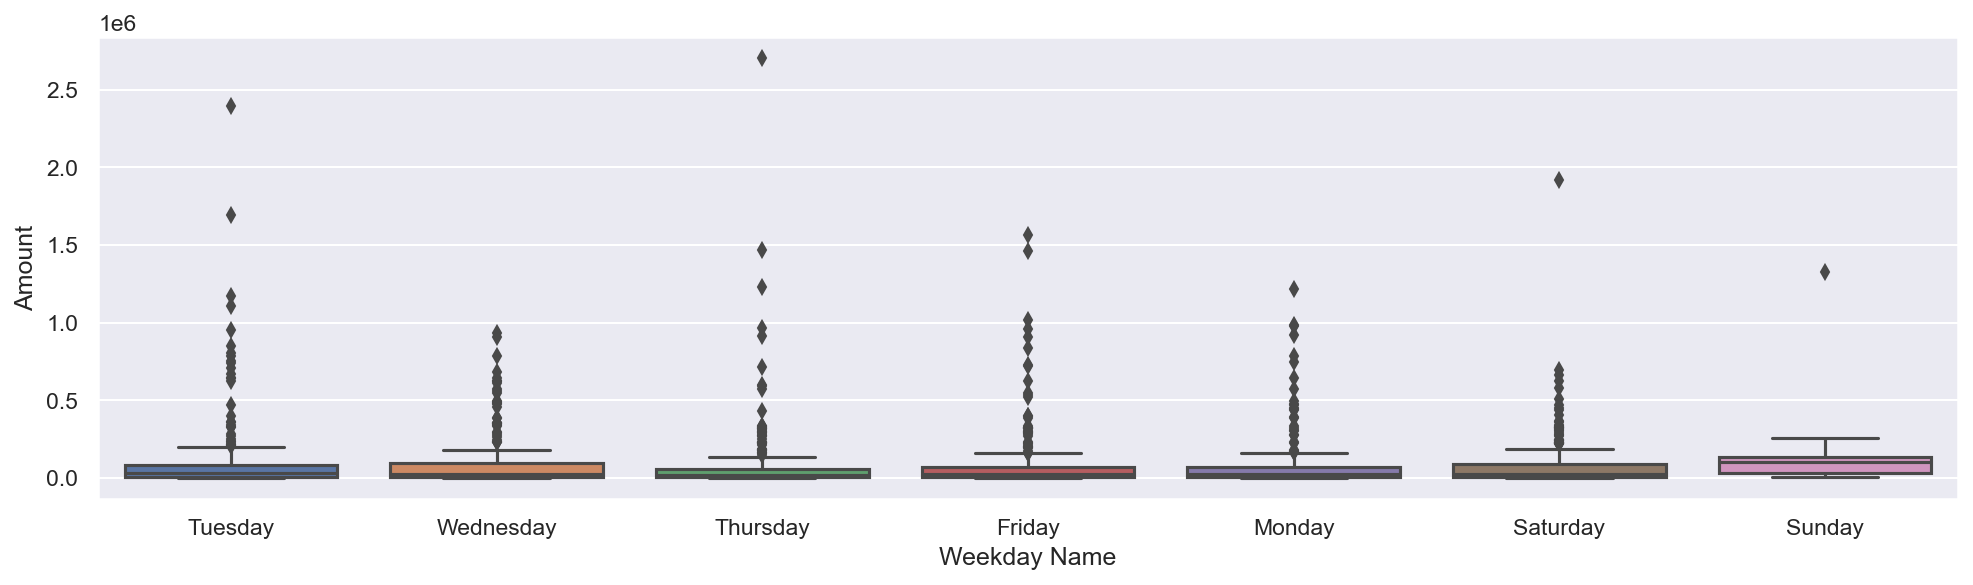

In [22]:
sns.boxplot(data=df_power, x='Weekday Name', y='Amount');


In [23]:
columns = ['Amount', 'Product Quantity']

power_weekly_mean = df_power[columns].resample('W').mean()
power_weekly_mean.head(10)

,Amount,Product Quantity
Date,,
2018-04-08,338188.000000,24.000000
2018-04-15,83669.000000,6.500000
2018-04-22,47007.333333,2.666667
2018-04-29,21380.500000,3.166667
2018-05-06,38721.250000,3.250000
2018-05-13,118618.500000,38.000000
2018-05-20,268621.000000,45.250000
2018-05-27,188645.850000,29.875000
2018-06-03,41068.000000,4.333333


In [24]:
start = '2023-01-01'
end = '2023-01-31'

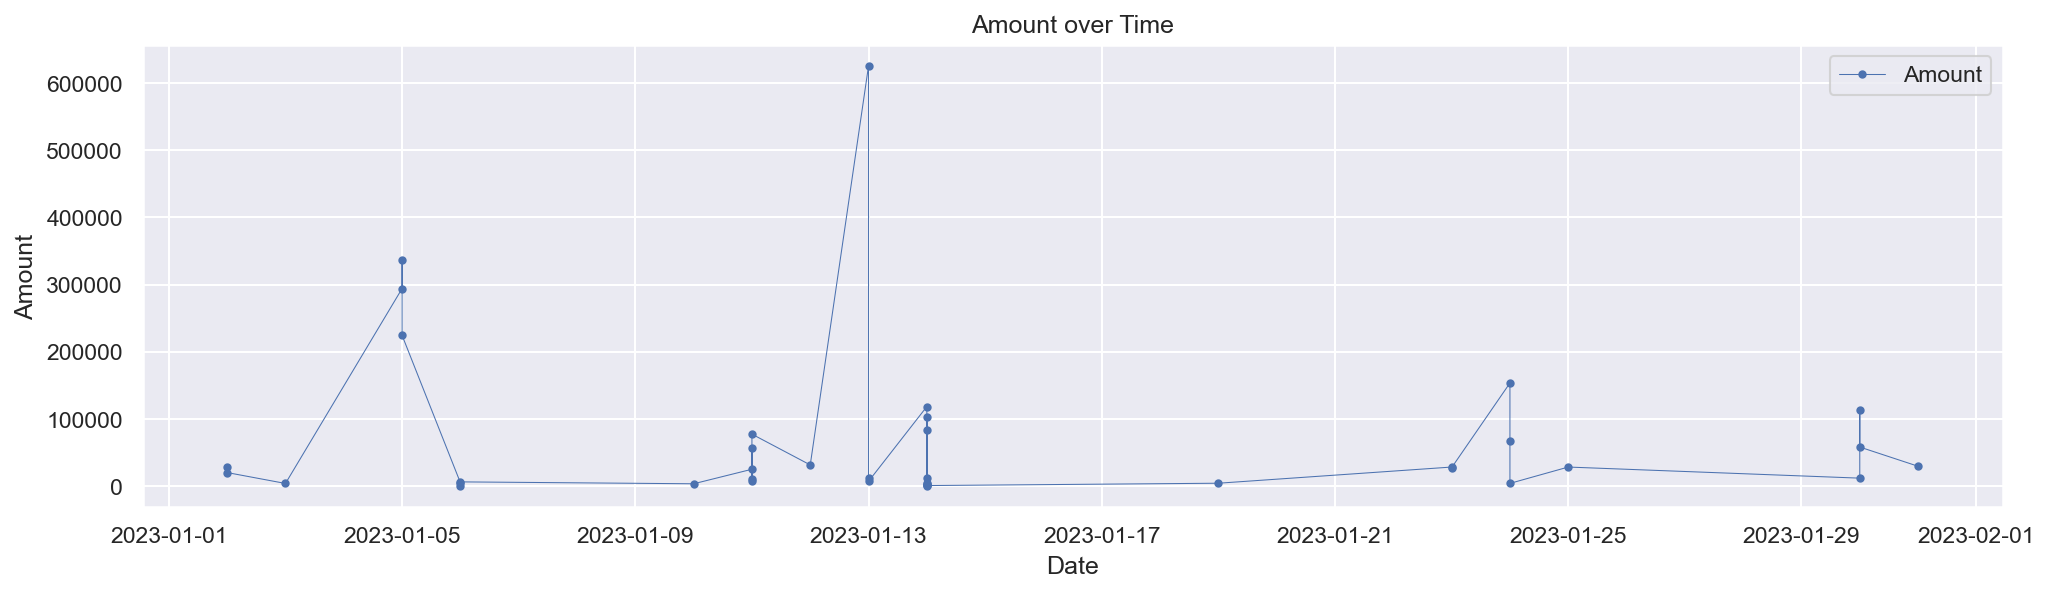

In [25]:
fig, ax = plt.subplots()
ax.plot(df_power.loc[start:end, 'Amount'], marker='.', linestyle='-', linewidth=0.5, label='Amount')

# Optionally, you might want to add labels and titles
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_title('Amount over Time')
ax.legend();